In [8]:
import pandas as pd
import numpy as np 
from datetime import date,datetime
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [24]:
original_df = pd.read_csv('full_data.csv')

In [25]:
month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
              'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10',
              'Nov': '11', 'Dec': '12'}

def convertStringIntoDate(newDate):
    #print(newDate)
    newDate = [x.strip() for x in newDate.split("-")]
    newDate[0] = int(newDate[0])
    newDate[1] = int(newDate[1])
    newDate[2] = int(newDate[2])
    return date(newDate[0],newDate[1],newDate[2])

In [26]:
def convertDateToInt(currDate, minDate):
    return (currDate - minDate).days

In [27]:
type_dict = {
    0: 'hurdle_win_percent',
    1: 'flat_win_percent',
    2: 'chase_win_percent'
}
going_dict = {
    13: 'soft_win_percent',
    14: 'soft_win_percent',
    15: 'soft_win_percent',
    19: 'soft_win_percent',
    1: 'firm_win_percent',
    2: 'firm_win_percent',
    8: 'heavy_win_percent',
    9: 'heavy_win_percent',
    10: 'heavy_win_percent',
    11: 'heavy_win_percent',
    12: 'heavy_win_percent',
    6: 'good_soft_win_percent',
    7: 'good_soft_win_percent',
    18: 'good_soft_win_percent',
    20: 'good_soft_win_percent',
    21: 'good_soft_win_percent',
    -1: 'good_win_percent',
    3: 'good_win_percent',
    4: 'good_win_percent',
    16: 'good_win_percent',
    17: 'good_win_percent',
    5: 'good_firm_win_percent',
    4: 'good_firm_win_percent',
    2: 'good_firm_win_percent'
}

going_basic_dict = {
    13: 'heavy_win_percent',
    14: 'heavy_win_percent',
    15: 'heavy_win_percent',
    19: 'heavy_win_percent',
    1: 'firm_win_percent',
    2: 'firm_win_percent',
    8: 'heavy_win_percent',
    9: 'heavy_win_percent',
    10: 'heavy_win_percent',
    11: 'heavy_win_percent',
    12: 'heavy_win_percent',
    6: 'good_win_percent',
    7: 'good_win_percent',
    18: 'good_win_percent',
    20: 'good_win_percent',
    21: 'good_win_percent',
    -1: 'good_win_percent',
    3: 'good_win_percent',
    4: 'good_win_percent',
    16: 'good_win_percent',
    17: 'good_win_percent',
    5: 'firm_win_percent',
    4: 'firm_win_percent',
    2: 'firm_win_percent'
}

dist_dict = {
    4: '0_6_win_percent',
    5: '0_6_win_percent',
    6 : '0_6_win_percent',
    7: '7_9_win_percent',
    8: '7_9_win_percent',
    9: '7_9_win_percent',
    10: '10_13_win_percent',
    11: '10_13_win_percent',
    12: '10_13_win_percent',
    13: '14_20_win_percent',
    14: '14_20_win_percent',
    15: '14_20_win_percent',
    16: '14_20_win_percent',
    17: '14_20_win_percent',
    18: '14_20_win_percent',
    19: '14_20_win_percent',
    20: '14_20_win_percent',
    21: '21_30_win_percent',
    22: '21_30_win_percent',
    23: '21_30_win_percent',
    24: '21_30_win_percent',
    25: '21_30_win_percent',
    26: '21_30_win_percent',
    27: '21_30_win_percent',
    28: '21_30_win_percent',
    29: '21_30_win_percent',
    30: '21_30_win_percent',
    31: '31_40_win_percent',
    32: '31_40_win_percent',
    33: '31_40_win_percent',
    34: '31_40_win_percent',
    35: '31_40_win_percent',
    36: '31_40_win_percent',
    37: '31_40_win_percent',
    38: '31_40_win_percent',
    39: '31_40_win_percent',
    40: '31_40_win_percent'
}

In [28]:
original_df['date'] = original_df['date'].apply(lambda row: convertStringIntoDate(row))
original_df = original_df.sort_values(["date","race_id"])

In [30]:
minimum_days = min(original_df['date'])
original_df['days'] = original_df['date'].apply(lambda row: convertDateToInt(row, minimum_days))

In [32]:
df = original_df.set_index(['race_id','horse_ids'])

In [83]:
horse_df = original_df.set_index(['horse_ids','race_id'])

In [84]:
days_since_last_race = horse_df.groupby('horse_ids')['days'].diff()

In [85]:
max_num_races = 10

In [86]:
val = days_since_last_race.values
val = [x if str(x)!="NaT" and str(x)!="nan" else np.nan  for x in val]
horse_df['days_since_last_race'] = val

In [87]:
# top_speeds nan fill
train_rating = horse_df.loc[horse_df.top_speeds!=0]

predict_rating_on_speed = horse_df.loc[(horse_df.ratings!=0) & (horse_df.top_speeds == 0)]
predict_speed_on_rating = horse_df.loc[(horse_df.ratings==0) & (horse_df.top_speeds != 0)]

train_data =  horse_df.loc[(horse_df.ratings!=0) & (horse_df.top_speeds!=0)]

In [103]:
horse_df.sort_index()

track_id  race_class  distance  going  race_age  \
horse_ids race_id                                                     
6496      547309.0      15.0           3    5280.0      4        41   
          548175.0      30.0           4    4400.0      6        41   
          549608.0      84.0           3    3520.0      4        41   
          551241.0      61.0           3    4510.0      6        17   
          565268.0      23.0           3    4180.0      6        14   
...                      ...         ...       ...    ...       ...   
3533494   783408.0     205.0          -1    3960.0     19        35   
3533495   783408.0     205.0          -1    3960.0     19        35   
3533496   783408.0     205.0          -1    3960.0     19        35   
3533498   783410.0     205.0          -1    4070.0     19        41   
3533500   783410.0     205.0          -1    4070.0     19        41   

                    race_handicap  race_type        date  draws  horse_ages  \
horse_ids race_id                                                             
6496      547309.0          False          0  2012-02-22      0          10   
          548175.0          False          0  2012-03-09      0          10   
          549608.0          False          0  2012-03-31      0          10   
          551241.0           True          0  2012-04-20      0          10   
          565268.0           True          0  2012-10-31      0          10   
...                           ...        ...         ...    ...         ...   
3533494   783408.0          False          2  2021-04-25      0           9   
3533495   783408.0          False          2  2021-04-25      0           9   
3533496   783408.0          False          2  2021-04-25      0           9   
3533498   783410.0           True          0  2021-04-25      0          10   
3533500   783410.0           True          0  2021-04-25      0          10   

                    ...  last_figures  best_figures_dist  best_figures_going  \
horse_ids race_id   ...                                                        
6496      547309.0  ...           0.0                0.0                 0.0   
          548175.0  ...           0.0                0.0                 0.0   
          549608.0  ...           0.0                0.0                 0.0   
          551241.0  ...           0.0                0.0                 0.0   
          565268.0  ...           0.0                0.0                 0.0   
...                 ...           ...                ...                 ...   
3533494   783408.0  ...           0.0                0.0                 0.0   
3533495   783408.0  ...           0.0                0.0                 0.0   
3533496   783408.0  ...           0.0                0.0                 0.0   
3533498   783410.0  ...           0.0                0.0                 0.0   
3533500   783410.0  ...           0.0                0.0                 0.0   

                    top_speeds  ratings  official_ratings    odds  places  \
horse_ids race_id                                                           
6496      547309.0          42     71.0                 0   34.00       5   
          548175.0           0      0.0                 0    8.00       0   
          549608.0          79     91.0                 0    6.50       1   
          551241.0          55    110.0                95    5.50       1   
          565268.0         113    120.0               103    3.75       1   
...                        ...      ...               ...     ...     ...   
3533494   783408.0           0      0.0                 0   62.00       0   
3533495   783408.0           0     91.0                 0   11.00       8   
3533496   783408.0           0     83.0                 0  160.00       9   
3533498   783410.0           0      0.0                 0   18.00       0   
3533500   783410.0           0     97.0                 0   16.00       7   

                    won  

In [104]:
horse_df.loc[(1370464, slice(None))][['days_since_last_race', 'date']]

,days_since_last_race,date
race_id,,
689345.0,NaN,2017-11-19
701697.0,173.0,2018-05-11
708384.0,83.0,2018-08-02
713227.0,66.0,2018-10-07
718038.0,63.0,2018-12-09
719532.0,20.0,2018-12-29
720945.0,21.0,2019-01-19
733185.0,144.0,2019-06-12
735682.0,37.0,2019-07-19


In [105]:
pred = model.predict(predict_rating_on_speed['ratings'].values.reshape(-1,1))
horse_df.loc[predict_rating_on_speed.index, 'top_speeds'] = pred.flatten()

In [106]:
model = LinearRegression()
model.fit(train_data['top_speeds'].values.reshape(-1,1),train_data['ratings'].values.reshape(-1,1))
pred = model.predict(predict_speed_on_rating['top_speeds'].values.reshape(-1,1))
horse_df.loc[predict_speed_on_rating.index, 'ratings'] = pred.flatten()

In [107]:
horse_df.loc[predict_speed_on_rating.index, 'ratings']

horse_ids  race_id 
746130     497696.0    42.186097
601838     496080.0    78.287269
692708     496080.0    53.738472
704476     498031.0    60.958707
750385     498295.0    53.738472
                         ...    
3095098    770231.0    46.518238
3175867    770231.0    45.074191
2242730    774894.0    57.348590
2788351    774894.0    50.850379
1954985    783238.0    42.908121
Name: ratings, Length: 965, dtype: float64

In [108]:
horse_df.loc[predict_rating_on_speed.index, 'top_speeds']

horse_ids  race_id 
551575     495887.0     56.626566
729756     495888.0     46.518238
742306     495889.0     60.958707
738778     495889.0     60.236683
735289     495889.0     45.074191
                          ...    
1817928    783410.0    120.164628
2219533    783410.0    111.500347
3533500    783410.0    110.778324
1652394    783410.0    109.334277
870182     783410.0     97.059879
Name: top_speeds, Length: 479509, dtype: float64

C:\Users\leish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings', ylabel='top_speeds'>

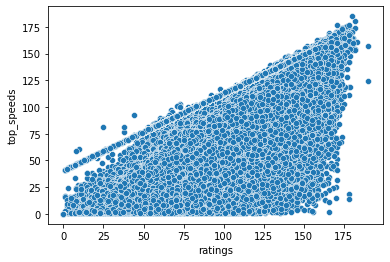

In [109]:
sns.scatterplot(horse_df['ratings'],horse_df['top_speeds'])

In [110]:
len(horse_df.loc[(horse_df.top_speeds != 0) & (horse_df.ratings != 0) &(horse_df.official_ratings != 0)]) , len(horse_df.loc[(horse_df.ratings != 0) &(horse_df.official_ratings == 0)])

(960269, 690965)

In [111]:
train_data[['top_speeds','ratings']].values

array([[27, 67],
       [18, 59],
       [13, 54],
       ...,
       [11, 67],
       [13, 70],
       [ 3, 65]], dtype=int64)

In [112]:
# official_ratin nan fill
train_rating = horse_df.loc[horse_df.top_speeds!=0]

predict_of = horse_df.loc[(horse_df.ratings!=0) & (horse_df.top_speeds!=0) & (horse_df.official_ratings == 0)]
predict_speed_on_rating = horse_df.loc[(horse_df.ratings==0) & (horse_df.top_speeds != 0)]

train_data =  horse_df.loc[(horse_df.ratings!=0) & (horse_df.top_speeds!=0) & (horse_df.official_ratings != 0)]

model = LinearRegression()
model.fit(train_data[['top_speeds','ratings']].values,train_data['official_ratings'].values.reshape(-1,1))
pred = model.predict(predict_of[['top_speeds','ratings']].values)
horse_df.loc[predict_of.index, 'official_ratings'] = pred.flatten()

In [113]:
mean_speed_figures = horse_df.groupby('horse_ids')['top_speeds'].rolling(5,min_periods=1,closed='left').mean().reset_index(0,drop=True)
horse_df['mean_speed_figures'] = mean_speed_figures
horse_df['mean_speed_figures'].isna().sum()

221291

In [114]:
horse_df['mean_ratings'] = horse_df.groupby('horse_ids')['ratings'].rolling(5,min_periods=1,closed='left').mean().reset_index(0,drop=True)
horse_df['mean_ratings'].isna().sum()

221291

In [115]:
#horse_df.loc[pd.IndexSlice[6496,:]]

In [116]:
#mean_speed_figures.loc[6496]

In [117]:
last_figures = horse_df.groupby('horse_ids')['top_speeds'].rolling(1,closed='left').sum().reset_index(0,drop=True)
horse_df['last_figures'] = last_figures

In [118]:
horse_df['last_ratings'] =  horse_df.drop(horse_df.loc[horse_df.ratings == 0].index).groupby('horse_ids')['ratings'].rolling(1,closed='left').sum().reset_index(0,drop=True)

In [119]:
horse_df['last_official_rating'] =  horse_df.drop(horse_df.loc[horse_df.official_ratings == 0].index).groupby('horse_ids')['official_ratings'].rolling(1,closed='left').sum().reset_index(0,drop=True)

In [120]:
horse_df['difference_in_ratings'] = horse_df['last_ratings'] - horse_df['last_official_rating']

In [121]:
horse_win_percents = horse_df.groupby('horse_ids')['won'].rolling(6,closed='left',min_periods=1).mean().reset_index(0,drop=True)
horse_df['horse_win_percents'] = horse_win_percents

In [122]:
horse_df['going'].unique()

array([18, 13,  8,  4,  6,  2, 20, 16,  1, 12, 11, 17, 19, 14,  5,  3,  7,
       21, 10, -1, 15,  9], dtype=int64)

In [123]:
going_ranks = pd.DataFrame([(8,10,11,3,9,12),(19,14,12),(13,12),(21,15),(6,20,15),(7,16),(4,16),(5,17),(2,1)])
going_ranks2 = pd.DataFrame([(8,10,11,3,9,12,19,14,12),(19,14,12,8,10,11,3,9),(13,12,19,14,21,15),(21,15,13,12,6,20,15),\
                            (6,20,15,21,7,16),(7,16,6,20,15,4),(4,16,7,5,17),(5,17,4,16),(2,1,5,17)])

In [124]:
horse_df['going_cat'] = horse_df['going'].replace(going_basic_dict)

In [125]:
best_figures_going = horse_df.groupby(['horse_ids','going'])['top_speeds'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
best_rating_going = horse_df.groupby(['horse_ids','going'])['ratings'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
best_official_rating_going = horse_df.groupby(['horse_ids','going'])['official_ratings'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
win_percent_going = horse_df.groupby(['horse_ids','going'])['won'].rolling(max_num_races,closed='left', min_periods=1).mean().reset_index([0,1],drop=True)

In [126]:
going_cat_figures = horse_df.groupby(['horse_ids','going_cat'])['top_speeds'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
going_cat_ratings = horse_df.groupby(['horse_ids','going_cat'])['ratings'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
going_cat_off_ratings = horse_df.groupby(['horse_ids','going_cat'])['official_ratings'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
going_cat_win_percent = horse_df.groupby(['horse_ids','going_cat'])['won'].rolling(max_num_races,closed='left', min_periods=1).mean().reset_index([0,1],drop=True)

In [127]:
best_figures_going.loc[best_figures_going.isna()] = going_cat_figures
best_rating_going.loc[best_rating_going.isna()] = going_cat_ratings
best_official_rating_going.loc[best_official_rating_going.isna()] = going_cat_off_ratings
win_percent_going.loc[win_percent_going.isna()] = going_cat_win_percent

In [128]:
horse_df['best_figures_going'] = best_figures_going
horse_df['best_rating_going'] = best_rating_going
horse_df['best_official_rating_going'] = best_official_rating_going
horse_df['win_percent_going'] = win_percent_going

In [162]:
horse_df['dist_categories'] = (horse_df['distance']/201.168).round()
best_figures_dist = horse_df.groupby(['horse_ids','dist_categories'])['top_speeds'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
best_rating_dist = horse_df.groupby(['horse_ids','dist_categories'])['ratings'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
best_official_rating_dist = horse_df.groupby(['horse_ids','dist_categories'])['official_ratings'].rolling(max_num_races,closed='left',min_periods=1).max().reset_index([0,1],drop=True)
win_percent_dist = horse_df.groupby(['horse_ids','dist_categories'])['won'].rolling(max_num_races,closed='left',min_periods=1).mean().reset_index([0,1],drop=True)

In [163]:
horse_df.groupby(['horse_ids','dist_categories'])['top_speeds'].sum()

horse_ids  dist_categories
6496       16.0                91.000000
           17.0                79.000000
           21.0               642.384863
           22.0               662.893808
           23.0               248.734894
                                 ...    
3533494    20.0                 0.000000
3533495    20.0               106.446183
3533496    20.0               100.669996
3533498    20.0                 0.000000
3533500    20.0               110.778324
Name: top_speeds, Length: 692703, dtype: float64

In [164]:
best_figures_dist.isna().groupby(level=0).sum().loc[best_figures_dist.isna().groupby(level=0).sum() > 3]

horse_ids
6496       10
13918       8
19018       5
35519       9
50971      10
           ..
3384364     4
3404054     4
3423093     4
3424363     4
3425692     4
Name: top_speeds, Length: 71887, dtype: int64

In [165]:
horse_df.loc[(303590,slice(None))][['distance','dist_categories','best_figures_dist','top_speeds']]

,distance,dist_categories,best_figures_dist,top_speeds
race_id,,,,
634490.0,1540.0,8.0,NaN,57.348590
635333.0,1870.0,9.0,57.348590,63.846801
638971.0,1760.0,9.0,63.846801,41.000000
647781.0,2200.0,11.0,NaN,62.000000
649387.0,2640.0,13.0,NaN,37.000000
650764.0,2750.0,14.0,37.000000,26.000000
652952.0,2860.0,14.0,37.000000,45.000000
654777.0,3080.0,15.0,45.000000,98.503925
656880.0,3520.0,17.0,98.503925,28.000000


In [166]:
horse_df['best_figures_dist'] = best_figures_dist
horse_df['best_rating_dist'] = best_rating_dist
horse_df['best_official_rating_dist'] = best_official_rating_dist
horse_df['win_percent_dist'] = win_percent_dist

In [167]:
jockey_df = original_df.set_index(['jockey_ids','horse_ids','race_id'])

In [168]:
jockey_win_percents = jockey_df.groupby(['jockey_ids'])['won'].rolling(20,closed='left',min_periods=1).mean().reset_index(0,drop=True)

In [169]:
jockey_df['jockey_win_percent'] = jockey_win_percents

In [170]:
a = jockey_df.loc[(85957,slice(None),slice(None))]['jockey_win_percent'].iloc[0:20]
real_jockey_wp = jockey_win_percents.reset_index(level='jockey_ids')

horse_df['jockey_win_percent'] = real_jockey_wp['won']

In [171]:
trainer_df = original_df.set_index(['trainer_ids','horse_ids','race_id'])
trainer_win_percent = trainer_df.groupby('trainer_ids')['won'].rolling(20,closed='left',min_periods=1).mean().reset_index(0,drop=True)

In [172]:
trainer_df['trainer_win_percent'] = trainer_win_percent
real_trainer_wp = trainer_win_percent.reset_index(level='trainer_ids')

In [173]:
trainer_df['trainer_win_percent'] = trainer_win_percent
real_trainer_wp = trainer_win_percent.reset_index(level='trainer_ids')

horse_df['trainer_win_percent'] = real_trainer_wp['won']

In [174]:
horse_df['placed'] = np.where((horse_df['places'] <= 3) & (horse_df['places'] >= 1), 1, 0)

In [175]:
df = horse_df.reset_index()

In [176]:
df = df.sort_values(by=['date','race_id'])
df = df.set_index(['race_id','horse_ids'])

In [177]:
new_data = pd.read_csv("full_data4.csv")
new_data.reset_index(inplace=True)
new_data = new_data.rename(columns={"index":"race_id","Unnamed: 0":"horse_ids","male_pedigree":"sire_id",
                                   "female_pedigree":"dam_id", "older_pedigree":"dam_sire_id"})
new_data.set_index(new_data.columns.tolist()[:2],inplace=True)

In [178]:
df2 = df.join(new_data)

In [179]:
sire_win_percent = df2.groupby("sire_id")['won'].mean().fillna(value=0).append(pd.Series(0))
dam_win_percent = df2.groupby("dam_id")['won'].mean().fillna(value=0).append(pd.Series(0))
dam_sire_win_percent = df2.groupby("dam_sire_id")['won'].mean().fillna(value=0).append(pd.Series(0))

dam_win_percent

92.0         0.000000
146.0        0.000000
249.0        0.200000
270.0        0.000000
302.0        0.107143
               ...   
3533490.0    0.000000
3533497.0    0.000000
3533499.0    0.000000
3575246.0    0.000000
0.0          0.000000
Length: 109178, dtype: float64

In [180]:
df2['dist_categories']

race_id   horse_ids
495885.0  716693       12.0
          708440       12.0
          718346       12.0
          744643       12.0
          714689       12.0
                       ... 
783410.0  1165301      20.0
          1175382      20.0
          1874997      20.0
          1996450      20.0
          3533498      20.0
Name: dist_categories, Length: 1868438, dtype: float64

In [181]:
def set_sire_win_percent(row):
    print(row['sire_id'])

In [182]:
df2[['sire_id','dam_id','dam_sire_id']] = df2[['sire_id','dam_id','dam_sire_id']].fillna(value=0)
df2['sire_win_percent'] = df2.apply(lambda row: sire_win_percent[row['sire_id']],axis=1)
df2['dam_win_percent'] = df2.apply(lambda row: dam_win_percent[row['dam_id']],axis=1)
df2['dam_sire_win_percent'] = df2.apply(lambda row: dam_sire_win_percent[row['dam_sire_id']],axis=1)
#test_df.apply(lambda row: set_sire_win_percent(row),axis=1)

In [183]:
"""sire_df = pd.DataFrame(data = df2['sire_id'].unique(), columns=["sire_id"])
sire_df = sire_df.set_index('sire_id')
sire_df['num_runners'] = df2.groupby('sire_id').count()['won'] 
sire_df['won'] = df2.groupby('sire_id').sum()['won']
sire_df['win_percent'] = df2.groupby('sire_id').mean()['sire_win_percent']
sire_df['flat_win_percent'] = df2.loc[df2.race_type == 1].groupby('sire_id').mean()['won']
sire_df['chase_win_percent'] = df2.loc[df2.race_type == 2].groupby('sire_id').mean()['won']
sire_df['hurdle_win_percent'] = df2.loc[df2.race_type == 0].groupby('sire_id').mean()['won']
sire_df['soft_win_percent'] = df2.loc[(df2.going == 13) | df2.going == 19].groupby('sire_id').mean()['won']
sire_df['standard_win_percent'] = df2.loc[(df2.going == 16) | (df2.going == 17)].groupby('sire_id').mean()['won']
sire_df['standard_slow_win_percent'] = df2.loc[(df2.going == 18) | (df2.going == 16) | (df2.going == 12)].groupby('sire_id').mean()['won']
sire_df['firm_win_percent'] = df2.loc[df2.going == 2].groupby('sire_id').mean()['won']
sire_df['heavy_win_percent'] = df2.loc[df2.going == 8].groupby('sire_id').mean()['won']
sire_df['good_soft_win_percent'] = df2.loc[(df2.going == 6) | (df2.going == 4) | (df2.going == 13)].groupby('sire_id').mean()['won']
sire_df['good_win_percent'] = df2.loc[df2.going == 4].groupby('sire_id').mean()['won']
sire_df['yielding_win_percent'] = df2.loc[df2.going == 20].groupby('sire_id').mean()['won'] 
sire_df['good_firm_win_percent'] = df2.loc[(df2.going == 5) | (df2.going == 4) | (df2.going == 2)].groupby('sire_id').mean()['won'] 
sire_df['fast_win_percent'] = df2.loc[df2.going == 1].groupby('sire_id').mean()['won'] 
sire_df['sloppy_win_percent'] = df2.loc[df2.going == 11].groupby('sire_id').mean()['won'] 
sire_df['good_yielding_win_percent'] = df2.loc[(df2.going == 7) | (df2.going == 4) | (df2.going == 20)].groupby('sire_id').mean()['won']
sire_df['yielding_soft_win_percent'] = df2.loc[(df2.going == 21) | (df2.going == 13) | (df2.going == 20)].groupby('sire_id').mean()['won'] 
sire_df['slow_win_percent'] = df2.loc[df2.going == 12].groupby('sire_id').mean()['won'] 
sire_df['soft_heavy_win_percent'] = df2.loc[(df2.going == 14) | (df2.going == 13) | (df2.going == 8)].groupby('sire_id').mean()['won'] 

horse_df.loc[(763453,slice(None))]['win_percent_dist']"""

'sire_df = pd.DataFrame(data = df2[\'sire_id\'].unique(), columns=["sire_id"])\nsire_df = sire_df.set_index(\'sire_id\')\nsire_df[\'num_runners\'] = df2.groupby(\'sire_id\').count()[\'won\'] \nsire_df[\'won\'] = df2.groupby(\'sire_id\').sum()[\'won\']\nsire_df[\'win_percent\'] = df2.groupby(\'sire_id\').mean()[\'sire_win_percent\']\nsire_df[\'flat_win_percent\'] = df2.loc[df2.race_type == 1].groupby(\'sire_id\').mean()[\'won\']\nsire_df[\'chase_win_percent\'] = df2.loc[df2.race_type == 2].groupby(\'sire_id\').mean()[\'won\']\nsire_df[\'hurdle_win_percent\'] = df2.loc[df2.race_type == 0].groupby(\'sire_id\').mean()[\'won\']\nsire_df[\'soft_win_percent\'] = df2.loc[(df2.going == 13) | df2.going == 19].groupby(\'sire_id\').mean()[\'won\']\nsire_df[\'standard_win_percent\'] = df2.loc[(df2.going == 16) | (df2.going == 17)].groupby(\'sire_id\').mean()[\'won\']\nsire_df[\'standard_slow_win_percent\'] = df2.loc[(df2.going == 18) | (df2.going == 16) | (df2.going == 12)].groupby(\'sire_id\').mea

In [184]:
sire_df = pd.DataFrame(data = df2['sire_id'].unique(), columns=["sire_id"])
sire_df = sire_df.set_index('sire_id')

df3 = df2.loc[(slice(None),sire_df.index.values),:]

og_win_percent = df2.loc[(slice(None),sire_df.index.values),:].groupby(level=[1])['won'].mean()
og_top_speeds = df2.loc[(slice(None),sire_df.index.values),:].groupby(level=[1])['top_speeds'].mean()
og_ratings = df2.loc[(slice(None),sire_df.index.values),:].groupby(level=[1])['ratings'].mean()

sire_df['num_runners'] = df2.groupby('sire_id').count()['won'] 
sire_df['won'] = df2.groupby('sire_id').sum()['won']
sire_df['og_win_percent'] = og_win_percent
sire_df['og_mean_top_speeds'] = og_top_speeds
sire_df['og_mean_ratings'] = og_ratings
sire_df['og_flat_win_percent'] = df3.loc[df2.race_type == 1].groupby(level=[1]).mean()['won']
sire_df['og_chase_win_percent'] = df3.loc[df2.race_type == 2].groupby(level=[1]).mean()['won']
sire_df['og_hurdle_win_percent'] = df3.loc[df2.race_type == 0].groupby(level=[1]).mean()['won']
sire_df['og_soft_win_percent'] = df3.loc[(df2.going == 13) | (df2.going == 19) | (df2.going == 14)].groupby(level=[1]).mean()['won']
sire_df['og_firm_win_percent'] = df3.loc[(df2.going == 2) | (df2.going == 1)].groupby(level=[1]).mean()['won']
sire_df['og_heavy_win_percent'] = df3.loc[(df2.going == 8) | (df2.going == 11) | (df2.going == 12) | (df2.going == 14)].groupby(level=[1]).mean()['won']
sire_df['og_good_soft_win_percent'] = df3.loc[(df2.going == 6) | (df2.going == 20) | (df2.going == 7) | (df2.going == 21) | (df2.going == 18)].groupby(level=[1]).mean()['won']
sire_df['og_good_win_percent'] = df3.loc[(df2.going == 4) | (df2.going == 16) | (df2.going == 17)].groupby(level=[1]).mean()['won']
sire_df['og_good_firm_win_percent'] = df3.loc[(df2.going == 5) | (df2.going == 4) | (df2.going == 2)].groupby(level=[1]).mean()['won'] 
sire_df['og_0_6_win_percent'] = df3.loc[(df2.dist_categories >= 0) & (df2.dist_categories <= 6)].groupby(level=[1]).mean()['won']
sire_df['og_7_9_win_percent'] = df3.loc[(df2.dist_categories >= 7) & (df2.dist_categories <= 9)].groupby(level=[1]).mean()['won']
sire_df['og_10_13_win_percent'] = df3.loc[(df2.dist_categories >= 10) & (df2.dist_categories <= 13)].groupby(level=[1]).mean()['won']
sire_df['og_14_20_win_percent'] = df3.loc[(df2.dist_categories >= 14) & (df2.dist_categories <= 20)].groupby(level=[1]).mean()['won']
sire_df['og_21_30_win_percent'] = df3.loc[(df2.dist_categories >= 21) & (df2.dist_categories <= 30)].groupby(level=[1]).mean()['won']
sire_df['og_31_40_win_percent'] = df3.loc[(df2.dist_categories >= 31) & (df2.dist_categories <= 40)].groupby(level=[1]).mean()['won']

sire_df['prog_win_percent'] = df2.groupby('sire_id').mean()['sire_win_percent']
sire_df['prog_mean_top_speeds'] = df2.groupby('sire_id').mean()['top_speeds']
sire_df['prog_mean_ratings'] = df2.groupby('sire_id').mean()['ratings']
sire_df['prog_flat_win_percent'] = df2.loc[df2.race_type == 1].groupby('sire_id').mean()['won']
sire_df['prog_chase_win_percent'] = df2.loc[df2.race_type == 2].groupby('sire_id').mean()['won']
sire_df['prog_hurdle_win_percent'] = df2.loc[df2.race_type == 0].groupby('sire_id').mean()['won']
sire_df['prog_soft_win_percent'] = df2.loc[(df2.going == 13) | (df2.going == 19) | (df2.going == 14)].groupby('sire_id').mean()['won']
sire_df['prog_firm_win_percent'] = df2.loc[(df2.going == 2) | (df2.going == 1)].groupby('sire_id').mean()['won']
sire_df['prog_heavy_win_percent'] = df2.loc[(df2.going == 8) | (df2.going == 11) | (df2.going == 12) | (df2.going == 14)].groupby('sire_id').mean()['won']
sire_df['prog_good_soft_win_percent'] = df2.loc[(df2.going == 6) | (df2.going == 20) | (df2.going == 7) | (df2.going == 21) | (df2.going == 18)].groupby('sire_id').mean()['won']
sire_df['prog_good_win_percent'] = df2.loc[(df2.going == 4) | (df2.going == 16) | (df2.going == 17)].groupby('sire_id').mean()['won']
sire_df['prog_good_firm_win_percent'] = df2.loc[(df2.going == 5) | (df2.going == 4) | (df2.going == 2)].groupby('sire_id').mean()['won'] 
sire_df['prog_0_6_win_percent'] = df2.loc[(df2.dist_categories >= 0) & (df2.dist_categories <= 6)].groupby('sire_id').mean()['won']
sire_df['prog_7_9_win_percent'] = df2.loc[(df2.dist_categories >= 7) & (df2.dist_categories <= 9)].groupby('sire_id').mean()['won']
sire_df['prog_10_13_win_percent'] = df2.loc[(df2.dist_categories >= 10) & (df2.dist_categories <= 13)].groupby('sire_id').mean()['won']
sire_df['prog_14_20_win_percent'] = df2.loc[(df2.dist_categories >= 12) & (df2.dist_categories <= 20)].groupby('sire_id').mean()['won']
sire_df['prog_21_30_win_percent'] = df2.loc[(df2.dist_categories >= 21) & (df2.dist_categories <= 30)].groupby('sire_id').mean()['won']
sire_df['prog_31_40_win_percent'] = df2.loc[(df2.dist_categories >= 31) & (df2.dist_categories <= 40)].groupby('sire_id').mean()['won']


In [185]:
sire_df.loc[763453.0]

num_runners                   2627.000000
won                            496.000000
og_win_percent                   1.000000
og_mean_top_speeds             111.214286
og_mean_ratings                129.642857
og_flat_win_percent              1.000000
og_chase_win_percent                  NaN
og_hurdle_win_percent                 NaN
og_soft_win_percent              1.000000
og_firm_win_percent                   NaN
og_heavy_win_percent                  NaN
og_good_soft_win_percent         1.000000
og_good_win_percent              1.000000
og_good_firm_win_percent         1.000000
og_0_6_win_percent                    NaN
og_7_9_win_percent               1.000000
og_10_13_win_percent             1.000000
og_14_20_win_percent                  NaN
og_21_30_win_percent                  NaN
og_31_40_win_percent                  NaN
prog_win_percent                 0.188809
prog_mean_top_speeds            61.138904
prog_mean_ratings               78.332318
prog_flat_win_percent            0

In [186]:
dam_df = pd.DataFrame(data = df2['dam_id'].unique(), columns=["dam_id"])
dam_df = dam_df.set_index('dam_id')

df3 = df2.loc[(slice(None),sire_df.index.values),:]

og_win_percent = df2.loc[(slice(None),dam_df.index.values),:].groupby(level=[1])['won'].mean()
og_top_speeds = df2.loc[(slice(None),dam_df.index.values),:].groupby(level=[1])['top_speeds'].mean()
og_ratings = df2.loc[(slice(None),dam_df.index.values),:].groupby(level=[1])['ratings'].mean()

dam_df['num_runners'] = df2.groupby('dam_id').count()['won'] 
dam_df['won'] = df2.groupby('dam_id').sum()['won']
dam_df['og_win_percent'] = og_win_percent
dam_df['og_mean_top_speeds'] = og_top_speeds
dam_df['og_mean_ratings'] = og_ratings
dam_df['og_flat_win_percent'] = df3.loc[df2.race_type == 1].groupby(level=[1]).mean()['won']
dam_df['og_chase_win_percent'] = df3.loc[df2.race_type == 2].groupby(level=[1]).mean()['won']
dam_df['og_hurdle_win_percent'] = df3.loc[df2.race_type == 0].groupby(level=[1]).mean()['won']
dam_df['og_soft_win_percent'] = df3.loc[(df2.going == 13) | (df2.going == 19) | (df2.going == 14)].groupby(level=[1]).mean()['won']
dam_df['og_firm_win_percent'] = df3.loc[(df2.going == 2) | (df2.going == 1)].groupby(level=[1]).mean()['won']
dam_df['og_heavy_win_percent'] = df3.loc[(df2.going == 8) | (df2.going == 11) | (df2.going == 12) | (df2.going == 14)].groupby(level=[1]).mean()['won']
dam_df['og_good_soft_win_percent'] = df3.loc[(df2.going == 6) | (df2.going == 20) | (df2.going == 7) | (df2.going == 21) | (df2.going == 18)].groupby(level=[1]).mean()['won']
dam_df['og_good_win_percent'] = df3.loc[(df2.going == 4) | (df2.going == 16) | (df2.going == 17)].groupby(level=[1]).mean()['won']
dam_df['og_good_firm_win_percent'] = df3.loc[(df2.going == 5) | (df2.going == 4) | (df2.going == 2)].groupby(level=[1]).mean()['won'] 
dam_df['og_0_6_win_percent'] = df3.loc[(df2.dist_categories >= 0) & (df2.dist_categories <= 6)].groupby(level=[1]).mean()['won']
dam_df['og_7_9_win_percent'] = df3.loc[(df2.dist_categories >= 7) & (df2.dist_categories <= 9)].groupby(level=[1]).mean()['won']
dam_df['og_10_13_win_percent'] = df3.loc[(df2.dist_categories >= 10) & (df2.dist_categories <= 13)].groupby(level=[1]).mean()['won']
dam_df['og_14_20_win_percent'] = df3.loc[(df2.dist_categories >= 14) & (df2.dist_categories <= 20)].groupby(level=[1]).mean()['won']
dam_df['og_21_30_win_percent'] = df3.loc[(df2.dist_categories >= 21) & (df2.dist_categories <= 30)].groupby(level=[1]).mean()['won']
dam_df['og_31_40_win_percent'] = df3.loc[(df2.dist_categories >= 31) & (df2.dist_categories <= 40)].groupby(level=[1]).mean()['won']

dam_df['prog_win_percent'] = df2.groupby('dam_id').mean()['dam_win_percent']
dam_df['prog_mean_top_speeds'] = df2.groupby('dam_id').mean()['top_speeds']
dam_df['prog_mean_ratings'] = df2.groupby('dam_id').mean()['ratings']
dam_df['prog_flat_win_percent'] = df2.loc[df2.race_type == 1].groupby('dam_id').mean()['won']
dam_df['prog_chase_win_percent'] = df2.loc[df2.race_type == 2].groupby('dam_id').mean()['won']
dam_df['prog_hurdle_win_percent'] = df2.loc[df2.race_type == 0].groupby('dam_id').mean()['won']
dam_df['prog_soft_win_percent'] = df2.loc[(df2.going == 13) | (df2.going == 19) | (df2.going == 14)].groupby('dam_id').mean()['won']
dam_df['prog_firm_win_percent'] = df2.loc[(df2.going == 2) | (df2.going == 1)].groupby('dam_id').mean()['won']
dam_df['prog_heavy_win_percent'] = df2.loc[(df2.going == 8) | (df2.going == 11) | (df2.going == 12) | (df2.going == 14)].groupby('dam_id').mean()['won']
dam_df['prog_good_soft_win_percent'] = df2.loc[(df2.going == 6) | (df2.going == 20) | (df2.going == 7) | (df2.going == 21) | (df2.going == 18)].groupby('dam_id').mean()['won']
dam_df['prog_good_win_percent'] = df2.loc[(df2.going == 4) | (df2.going == 16) | (df2.going == 17)].groupby('dam_id').mean()['won']
dam_df['prog_good_firm_win_percent'] = df2.loc[(df2.going == 5) | (df2.going == 4) | (df2.going == 2)].groupby('dam_id').mean()['won'] 
dam_df['prog_0_6_win_percent'] = df2.loc[(df2.dist_categories >= 0) & (df2.dist_categories <= 6)].groupby('dam_id').mean()['won']
dam_df['prog_7_9_win_percent'] = df2.loc[(df2.dist_categories >= 7) & (df2.dist_categories <= 9)].groupby('dam_id').mean()['won']
dam_df['prog_10_13_win_percent'] = df2.loc[(df2.dist_categories >= 10) & (df2.dist_categories <= 13)].groupby('dam_id').mean()['won']
dam_df['prog_14_20_win_percent'] = df2.loc[(df2.dist_categories >= 14) & (df2.dist_categories <= 20)].groupby('dam_id').mean()['won']
dam_df['prog_21_30_win_percent'] = df2.loc[(df2.dist_categories >= 21) & (df2.dist_categories <= 30)].groupby('dam_id').mean()['won']
dam_df['prog_31_40_win_percent'] = df2.loc[(df2.dist_categories >= 31) & (df2.dist_categories <= 40)].groupby('dam_id').mean()['won']


In [187]:
df2['dist_categories'].unique()

array([12.,  5., 15.,  7.,  9., 19., 29., 23., 26., 22., 17., 13.,  8.,
       10., 18., 20., 11., 31., 21., 24., 27., 28., 30., 25., 14., 35.,
        6., 32., 34., 33., 16., 37., 39., 38., 36., 40.,  4.])

In [188]:
# Set Rows
def set_dam_sire_stats(row):
    if row['sire_id'] in sire_df:
        return 1
    return 0

In [189]:
"""test_df = df2.merge(sire_df, on="sire_id")
test_df = test_df.merge(dam_df, on="dam_id")
test_df"""

'test_df = df2.merge(sire_df, on="sire_id")\ntest_df = test_df.merge(dam_df, on="dam_id")\ntest_df'

In [190]:
type_dict = {
    0: 'hurdle_win_percent',
    1: 'flat_win_percent',
    2: 'chase_win_percent'
}
going_dict = {
    13: 'soft_win_percent',
    14: 'soft_win_percent',
    15: 'soft_win_percent',
    19: 'soft_win_percent',
    1: 'firm_win_percent',
    2: 'firm_win_percent',
    8: 'heavy_win_percent',
    9: 'heavy_win_percent',
    10: 'heavy_win_percent',
    11: 'heavy_win_percent',
    12: 'heavy_win_percent',
    6: 'good_soft_win_percent',
    7: 'good_soft_win_percent',
    18: 'good_soft_win_percent',
    20: 'good_soft_win_percent',
    21: 'good_soft_win_percent',
    -1: 'good_win_percent',
    3: 'good_win_percent',
    4: 'good_win_percent',
    16: 'good_win_percent',
    17: 'good_win_percent',
    5: 'good_firm_win_percent',
    4: 'good_firm_win_percent',
    2: 'good_firm_win_percent'
}

dist_dict = {
    4: '0_6_win_percent',
    5: '0_6_win_percent',
    6 : '0_6_win_percent',
    7: '7_9_win_percent',
    8: '7_9_win_percent',
    9: '7_9_win_percent',
    10: '10_13_win_percent',
    11: '10_13_win_percent',
    12: '10_13_win_percent',
    13: '14_20_win_percent',
    14: '14_20_win_percent',
    15: '14_20_win_percent',
    16: '14_20_win_percent',
    17: '14_20_win_percent',
    18: '14_20_win_percent',
    19: '14_20_win_percent',
    20: '14_20_win_percent',
    21: '21_30_win_percent',
    22: '21_30_win_percent',
    23: '21_30_win_percent',
    24: '21_30_win_percent',
    25: '21_30_win_percent',
    26: '21_30_win_percent',
    27: '21_30_win_percent',
    28: '21_30_win_percent',
    29: '21_30_win_percent',
    30: '21_30_win_percent',
    31: '31_40_win_percent',
    32: '31_40_win_percent',
    33: '31_40_win_percent',
    34: '31_40_win_percent',
    35: '31_40_win_percent',
    36: '31_40_win_percent',
    37: '31_40_win_percent',
    38: '31_40_win_percent',
    39: '31_40_win_percent',
    40: '31_40_win_percent'
}

In [191]:
def get_sire_stats(row):
    result = sire_df.loc[row['sire_id']]
    return result["og_"+going_dict[row['going']]], result["prog_"+going_dict[row['going']]]\
        , result["og_"+type_dict[row['race_type']]], result["prog_"+type_dict[row['race_type']]]\
        , result["og_"+dist_dict[row['dist_categories']]], result["prog_"+dist_dict[row['dist_categories']]]

In [192]:
df2['sire_og_going_win_percent'],df2['sire_prog_going_win_percent']\
,df2['sire_og_type_win_percent'],df2['sire_prog_type_win_percent']\
,df2['sire_og_dist_win_percent'],df2['sire_prog_dist_win_percent']= zip(*df2.apply(lambda row: get_sire_stats(row), axis=1))

df2['dam_og_going_win_percent'],df2['dam_prog_going_win_percent']\
,df2['dam_og_type_win_percent'],df2['dam_prog_type_win_percent']\
,df2['dam_og_dist_win_percent'],df2['dam_prog_dist_win_percent']= zip(*df2.apply(lambda row: get_sire_stats(row), axis=1))
df2

track_id  race_class  distance  going  race_age  \
race_id  horse_ids                                                    
495885.0 716693        394.0           5    2420.0     18        32   
         708440        394.0           5    2420.0     18        32   
         718346        394.0           5    2420.0     18        32   
         744643        394.0           5    2420.0     18        32   
         714689        394.0           5    2420.0     18        32   
...                      ...         ...       ...    ...       ...   
783410.0 1165301       205.0          -1    4070.0     19        41   
         1175382       205.0          -1    4070.0     19        41   
         1874997       205.0          -1    4070.0     19        41   
         1996450       205.0          -1    4070.0     19        41   
         3533498       205.0          -1    4070.0     19        41   

                    race_handicap  race_type        date  draws  horse_ages  \
race_id  horse_ids                                                            
495885.0 716693             False          1  2010-01-01      5           9   
         708440             False          1  2010-01-01      3           9   
         718346             False          1  2010-01-01      7           9   
         744643             False          1  2010-01-01      6           9   
         714689             False          1  2010-01-01      4          10   
...                           ...        ...         ...    ...         ...   
783410.0 1165301             True          0  2021-04-25      0          15   
         1175382             True          0  2021-04-25      0          12   
         1874997             True          0  2021-04-25      0          12   
         1996450             True          0  2021-04-25      0          11   
         3533498             True          0  2021-04-25      0          10   

                    ...  sire_og_type_win_percent  sire_prog_type_win_percent  \
race_id  horse_ids  ...                                                         
495885.0 716693     ...                       NaN                    0.055738   
         708440     ...                       NaN                    0.100775   
         718346     ...                       NaN                    0.102041   
         744643     ...                       NaN                    0.047337   
         714689     ...                       NaN                    0.072193   
...                 ...                       ...                         ...   
783410.0 1165301    ...                       NaN                    0.147459   
         1175382    ...                       NaN                    0.000000   
         1874997    ...                       NaN                    0.000000   
         1996450    ...                       NaN                    0.150000   
         3533498    ...                       NaN                    0.138373   

                    sire_og_dist_win_percent  sire_prog_dist_win_percent  \
race_id  horse_ids                                                         
495885.0 716693                          NaN                    0.070175   
         708440                          NaN                    0.092784   
         718346                          NaN                    0.142857   
         744643                          NaN                    0.000000   
         714689                          NaN                    0.079646   
...                                      ...                         ...   
783410.0 1165301                         NaN                    0.109424   
         1175382                         NaN                    0.000000   
         1874997                         0.0                    0.053333   
         1996450                         NaN                    0.082474   
         3533498                         NaN                    0.127624   

                    dam_o

In [193]:
dam_sire_df = pd.DataFrame(data= df2['dam_sire_id'].unique(), columns=["dam_sire_id"])
dam_sire_df.set_index('dam_sire_id')

df2['dam_sire_win_percent'] = df2.groupby('dam_sire_id').mean()['dam_sire_win_percent']

In [194]:
df2.to_csv('full_data_with_features.csv')